<a href="https://colab.research.google.com/github/lincentpega/course-work-2022/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.simplefilter('ignore')

# увеличиваем дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Jupyter Notebooks/Course-work-2022/Iris/iris.data', sep=',')
data.columns = ['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class']
numeric = ['sep_length', 'sep_width', 'pet_length', 'pet_width']

# integerized_data = preprocessing.LabelEncoder().fit(data['class'])
# data['class'] = integerized_data.transform(data['class'])
# print('class', integerized_data.classes_)


In [ ]:
data_new = pd.get_dummies(data, columns=["class"], prefix="class")

In [ ]:
data_new.head()

,sep_length,sep_width,pet_length,pet_width,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,4.9,3.0,1.4,0.2,1,0,0
1,4.7,3.2,1.3,0.2,1,0,0
2,4.6,3.1,1.5,0.2,1,0,0
3,5.0,3.6,1.4,0.2,1,0,0
4,5.4,3.9,1.7,0.4,1,0,0


In [ ]:
%config InlineBackend.figure_format = 'png'
# sns.pairplot(data[numeric + ['class']], hue='class', kind='kde')
# plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def deriv_tanh(x):
    return 1 - np.square(np.tanh(x))

def deriv_sigmoid(x):
  fx = sigmoid(x)
  return fx * (1 - fx)

def mse_loss(y, y_hat):
  return ((y - y_hat) ** 2).mean()

def logloss(y, a):
  return -(y*np.log(a) + (1-y)*np.log(1-a))

def d_logloss(y, a):
    return (a - y)/(a*(1 - a))


In [ ]:
class Layer:

    activationFunctions = {
        'tanh': (tanh, deriv_tanh),
        'sigmoid': (sigmoid, deriv_sigmoid)
    }
    learning_rate = 0.1

    def __init__(self, inputs, neurons, activation):
        self.W = np.random.randn(neurons, inputs)
        self.b = np.zeros((neurons, 1))
        self.act, self.d_act = self.activationFunctions.get(activation)

    def feedforward(self, A_prev):
        self.A_prev = A_prev
        self.Z = np.dot(self.W, self.A_prev) + self.b
        self.A = self.act(self.Z)
        return self.A

    def backprop(self, dA):
        dZ = np.multiply(self.d_act(self.Z), dA)
        dW = 1/dZ.shape[1] * np.dot(dZ, self.A_prev.T)
        db = 1/dZ.shape[1] * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)

        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

        return dA_prev

m - number of samples

In [ ]:
from sklearn.model_selection import train_test_split
X = data_new.to_numpy()
X = X[:, :-3]
Y = data_new.to_numpy()
Y = Y[:,-3:]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T

m = 75
epochs = 3000

In [ ]:
# from sklearn.linear_model import LogisticRegression

# logisticRegr = LogisticRegression()
# logisticRegr.fit(x_train.T, y_train.T)
# log_predictions = logisticRegr.predict(x_test)

In [ ]:
layers = [Layer(4, 7, 'sigmoid'), Layer(7, 3, 'sigmoid')]
costs = [] # to plot graph 

for epoch in range(epochs):
    # Feedforward

    A = x_train
    for layer in layers:
        A = layer.feedforward(A)
    # Calulate cost to plot graph
    cost = 1/m * np.sum(logloss(y_train, A))
    costs.append(cost)

    # Backpropagation
    dA = d_logloss(y_train, A)
    for layer in reversed(layers):
        dA = layer.backprop(dA)


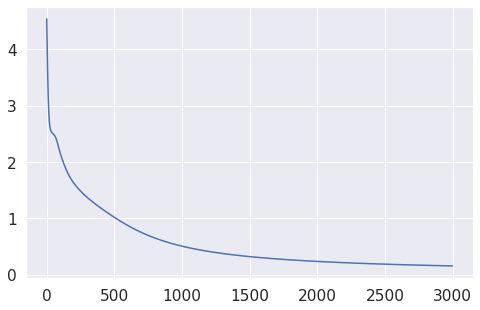

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(epochs), costs)
plt.show()

In [ ]:
x_test = data_new.to_numpy()
x_test = x_test[1::2, 0:-3].T

y_test = data_new.to_numpy()
y_test = y_test[1::2,-3:]
m = 74

# Making predictions
A = x_test
for layer in layers:
    A = layer.feedforward(A)
A = np.around(A) # округление, чтобы получить one hote code

y_cap = A.T.copy()


accuracy =  0.972972972972973


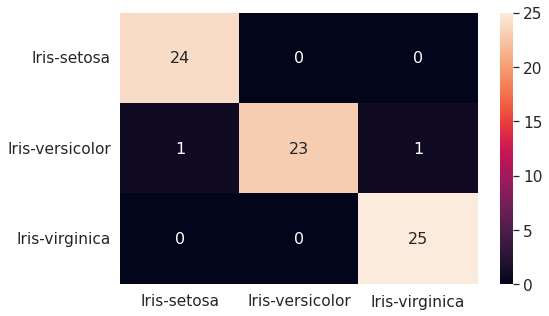

In [ ]:
from sklearn.svm import SVC
lb = preprocessing.LabelBinarizer()
lb.fit([1, 2, 3])

y_cap_integerized = lb.inverse_transform(y_cap)
y_test_integerized = lb.inverse_transform(y_test)

conf_matrix = metrics.confusion_matrix(y_test_integerized, y_cap_integerized)

sum_true = 0
sum_false = 0
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        if i == j:
            sum_true += conf_matrix[i][j]
        else: sum_false += conf_matrix[i][j]

accuracy = sum_true / (sum_false + sum_true) 
print('accuracy = ', accuracy) 

df_cm = pd.DataFrame(conf_matrix, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()


In [ ]:
# log_conf_matrix = metrics.confusion_matrix(y_test_integerized, log_predictions)

# sum_true = 0
# sum_false = 0
# for i in range(log_conf_matrix.shape[0]):
#     for j in range(log_conf_matrix.shape[1]):
#         if i == j:
#             sum_true += log_conf_matrix[i][j]
#         else: sum_false += log_conf_matrix[i][j]

# accuracy = sum_true / (sum_false + sum_true) 
# print('accuracy = ', accuracy) 

# df_cm = pd.DataFrame(log_conf_matrix, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
# sns.set(font_scale=1.4)
# sns.heatmap(df_cm, annot=True, annot_kws={"size": 16})
# plt.show()